In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#Create an overall Table:
data = {'country':['India', 'Philippines', 'Bangladesh', 'China', 'Saudi Arabia', 'Poland', 'Russia', 'Germany', 'Ukraine', 'Serbia', 'Albania', 'Ecuador', 'Colombia', 'Brazil', 'Chile', 'Uganda', 'Kenya', 'Ethiopia', 'Morocco', 'South Africa', 'Nigeria', 'Burundi', 'United States', 'Canada', 'Mexico', 'Dominican Republic', 'Guatemala', 'Haiti', 'Australia', 'New Zealand', 'Solomon Islands', 'Fiji'], 
        'continent':['Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'South America', 'South America', 'South America', 'South America', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'Oceania', 'Oceania','Oceania','Oceania']}
continents = pd.DataFrame(data) 

pop = pd.read_csv('../datasets/CleanedPopulation/Clean_population.csv')
pop2015 = pop.iloc[:,[0,4]]
pop2015.rename(columns={'2015' : 'population (K)'}, inplace=True)

gdp = pd.read_csv('../datasets/CleanedGDP/Clean_gdp2.csv')
gdp2015 = gdp.iloc[:,[0,4]]
gdp2015.rename(columns={'Country' : 'country', '2015' : 'GDP'}, inplace=True)
gdp2015.GDP = gdp2015.GDP.astype(int)

acute = pd.read_csv('../datasets/CleanedDiseases/CleanedAcute_Lower_Respiratory_infections.csv')
acute2015 = acute.iloc[:,[0,4]]
acute2015.rename(columns={'Countries' : 'country', '2015' : 'acute_deaths'}, inplace=True)

injuries = pd.read_csv('../datasets/CleanedDiseases/CleanedInjuries.csv')
injuries2015 = injuries.iloc[:,[0,4]]
injuries2015.rename(columns={'Countries' : 'country', '2015' : 'injuries_deaths'}, inplace=True)

measles = pd.read_csv('../datasets/CleanedDiseases/Cleanedmeasles_mortality.csv')
measles2015 = measles.iloc[:,[0,4]]
measles2015.rename(columns={'Countries' : 'country', '2015' : 'measles_deaths'}, inplace=True)

prematurity = pd.read_csv('../datasets/CleanedDiseases/CleanedPrematurity.csv')
prematurity2015 = prematurity.iloc[:,[0,4]]
prematurity2015.rename(columns={'Countries' : 'country', '2015' : 'prematurity_deaths'}, inplace=True)

sepsis = pd.read_csv('../datasets/CleanedDiseases/CleanedSepsis.csv')
sepsis2015 = sepsis.iloc[:,[0,4]]
sepsis2015.rename(columns={'Countries' : 'country', '2015' : 'sepsis_deaths'}, inplace=True)

merged = pd.merge(continents, pop2015, on='country', how='inner')
merged = pd.merge(merged, gdp2015, on='country', how='inner')
merged = pd.merge(merged, acute2015, on='country', how='inner')
merged = pd.merge(merged, injuries2015, on='country', how='inner')
merged = pd.merge(merged, measles2015, on='country', how='inner')
merged = pd.merge(merged, prematurity2015, on='country', how='inner')
merged = pd.merge(merged, sepsis2015, on='country', how='inner')
merged

#RIGHT HERE IT'S STRAIGHT FROM TABLES---

#divide by population to get real feel of disease badness
merged['acute_deaths']    = merged['acute_deaths'] / (merged['population (K)']/1000)  #deaths per million of total population
merged['injuries_deaths'] = merged['injuries_deaths'] / (merged['population (K)']/1000) 
merged['measles_deaths']  = merged['measles_deaths'] / (merged['population (K)']/1000) 
merged['prematurity_deaths'] = merged['prematurity_deaths'] / (merged['population (K)']/1000) 
merged['sepsis_deaths']   = merged['sepsis_deaths'] / (merged['population (K)']/1000) 

#sort by GDP
merged = merged.sort_values(by=['GDP'])

#multiply GDP by a factor to show proportion
merged['GDP'] = merged['GDP'] / 120

merged

C:\Users\Matthew\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
C:\Users\Matthew\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,country,continent,population (K),GDP,acute_deaths,injuries_deaths,measles_deaths,prematurity_deaths,sepsis_deaths
0,India,Asia,1251696,5756,106367,40875,32742,311293,81239
1,Philippines,Asia,100999,6874,5295,5775,510,11458,4447
2,Bangladesh,Asia,168958,3132,8563,8303,6,20859,12786
3,China,Asia,1367486,13569,5461,27372,1104,31132,2611
4,Saudi Arabia,Asia,27753,50723,55,528,0,1246,175
5,Poland,Europe,38563,25299,1,79,0,686,33
6,Russia,Europe,142424,24516,133,1546,0,3126,418
7,Germany,Europe,80855,43937,10,131,1,756,43
8,Ukraine,Europe,44430,7464,276,245,32,1118,107
9,Serbia,Europe,7177,13277,2,25,0,265,11


,country,continent,population (K),GDP,acute_deaths,injuries_deaths,measles_deaths,prematurity_deaths,sepsis_deaths
21,Burundi,Africa,10743,6.233333,232.988923,201.154240,3.164852,321.046263,149.306525
17,Ethiopia,Africa,99466,12.775000,165.604327,135.000905,218.325860,291.054230,166.489052
27,Haiti,North America,10111,13.758333,197.903274,136.287212,0.000000,280.288794,115.616655
15,Uganda,Africa,37102,13.875000,195.083823,160.422619,7.196378,305.104846,167.807665
30,Solomon Islands,Oceania,623,17.908333,46.548957,56.179775,0.000000,86.677368,35.313002
16,Kenya,Africa,45926,23.625000,116.252232,112.485302,3.919349,223.968994,103.144188
2,Bangladesh,Asia,168958,26.100000,50.681234,49.142390,0.035512,123.456717,75.675612
20,Nigeria,Africa,181563,47.250000,446.825620,222.369095,89.148119,473.929160,171.890749
0,India,Asia,1251696,47.966667,84.978301,32.655693,26.158109,248.696968,64.903139
1,Philippines,Asia,100999,57.283333,52.426262,57.178784,5.049555,113.446668,44.030139


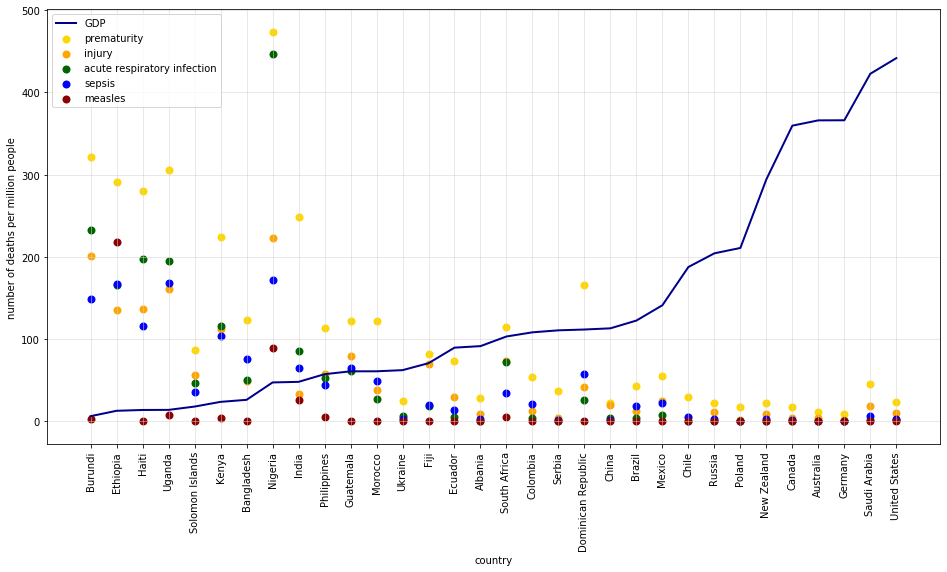

In [3]:
import matplotlib.pyplot as plt
import numpy as np
 

# Plot GDP vs diseases:
plt.figure(figsize=(16,8))
plt.plot('country', 'GDP', data=merged, color='darkblue', linewidth=2, label="GDP")
plt.scatter('country', 'prematurity_deaths', data=merged, color='gold', linewidth=2, label="prematurity")
plt.scatter('country', 'injuries_deaths', data=merged, color='orange', linewidth=2, label="injury")
plt.scatter('country', 'acute_deaths', data=merged, color='darkgreen', linewidth=2, label="acute respiratory infection")
plt.scatter('country', 'sepsis_deaths', data=merged, color='blue', linewidth=2, label="sepsis")
plt.scatter('country', 'measles_deaths', data=merged, color='darkred', linewidth=2, label="measles")

plt.xlabel('country')
plt.ylabel('number of deaths per million people')
plt.legend(loc='center')
plt.grid(linestyle='-', linewidth='0.5', color='lightgray')
plt.xticks(rotation = 90)
plt.legend()
plt.show();


In [4]:
#Correlation Matrix:

In [5]:
import seaborn as sn
gdp_diseases = merged.iloc[:,2:]

#multiply GDP by a factor to show proportion
merged['GDP'] = merged['GDP'] * 0.1 

#create a correlation matrix df
corrMatrix = gdp_diseases.corr()
corrMatrix = corrMatrix.round(1)
corrMatrix

,population (K),GDP,acute_deaths,injuries_deaths,measles_deaths,prematurity_deaths,sepsis_deaths
population (K),1.0,-0.1,-0.0,-0.1,0.1,0.0,-0.0
GDP,-0.1,1.0,-0.5,-0.6,-0.2,-0.6,-0.6
acute_deaths,-0.0,-0.5,1.0,0.9,0.5,0.9,0.9
injuries_deaths,-0.1,-0.6,0.9,1.0,0.4,0.9,0.9
measles_deaths,0.1,-0.2,0.5,0.4,1.0,0.5,0.6
prematurity_deaths,0.0,-0.6,0.9,0.9,0.5,1.0,1.0
sepsis_deaths,-0.0,-0.6,0.9,0.9,0.6,1.0,1.0


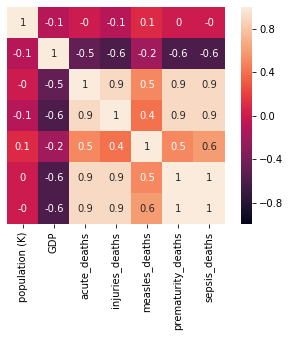

In [6]:
#create a correlation heatmap
sn.heatmap(corrMatrix, annot=True, vmin=-1, vmax=1,  xticklabels=1, yticklabels=False, square=True)

In [7]:
#Note: the vertical labels were impossible to make without ruining dimensions.
#Instead, we can copy the labels from the x axis and rotate them manually.